In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Bird_data.xlsx'  # Update this path if your file is located elsewhere
excel_data = pd.ExcelFile(file_path)

# Load the data from sheet "Sheet1"
bird_data = excel_data.parse("Sheet1")

# Display the first few rows to understand the structure
bird_data.head()


,Bird,total Length,Alar Extent,Length of Beak+head,Length of Humerus,Length of Kneel,Dead or Survived
0,Bird,X1,X2,X3,X4,X5,X6
1,1,156,245,31.6,18.5,20.5,0
2,2,154,240,30.4,17.9,19.6,0
3,3,153,240,31,18.4,20.6,0
4,4,153,236,30.9,17.7,20.2,0


In [3]:
# Remove the first row which contains descriptions and set the correct column headers
bird_data.columns = bird_data.iloc[0]
bird_data = bird_data[1:]

# Rename columns to their intended descriptions
bird_data.columns = ['Bird', 'Total Length', 'Alar Extent', 'Length of Beak+head', 'Length of Humerus', 'Length of Kneel', 'Dead or Survived']

# Convert relevant columns to numerical types
numerical_columns = ['Total Length', 'Alar Extent', 'Length of Beak+head', 'Length of Humerus', 'Length of Kneel', 'Dead or Survived']
bird_data[numerical_columns] = bird_data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Split data into two groups: dead birds (Dead or Survived = 0) and live birds (Dead or Survived = 1)
dead_birds = bird_data[bird_data['Dead or Survived'] == 0]
live_birds = bird_data[bird_data['Dead or Survived'] == 1]


In [4]:
# Calculate descriptive statistics for both groups
dead_stats = dead_birds.describe()
live_stats = live_birds.describe()

# Display the descriptive statistics
print("Descriptive Statistics for Dead Birds:\n", dead_stats)
print("\nDescriptive Statistics for Live Birds:\n", live_stats)


Descriptive Statistics for Dead Birds:
        Total Length  Alar Extent  Length of Beak+head  Length of Humerus  \
count     20.000000    20.000000            20.000000          20.000000   
mean     157.450000   240.800000            31.425000          18.500000   
std        3.394655     4.187701             0.746835           0.430422   
min      153.000000   235.000000            30.300000          17.700000   
25%      155.000000   237.750000            30.900000          18.175000   
50%      157.000000   240.000000            31.350000          18.550000   
75%      159.250000   244.250000            32.000000          18.650000   
max      164.000000   248.000000            32.800000          19.300000   

       Length of Kneel  Dead or Survived  
count        20.000000              20.0  
mean         20.825000               0.0  
std           0.774512               0.0  
min          19.600000               0.0  
25%          20.200000               0.0  
50%          20.7

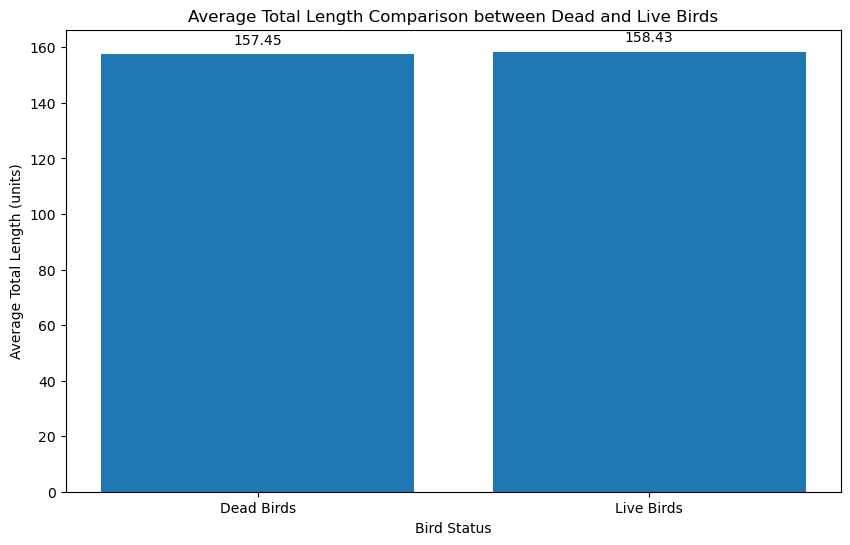

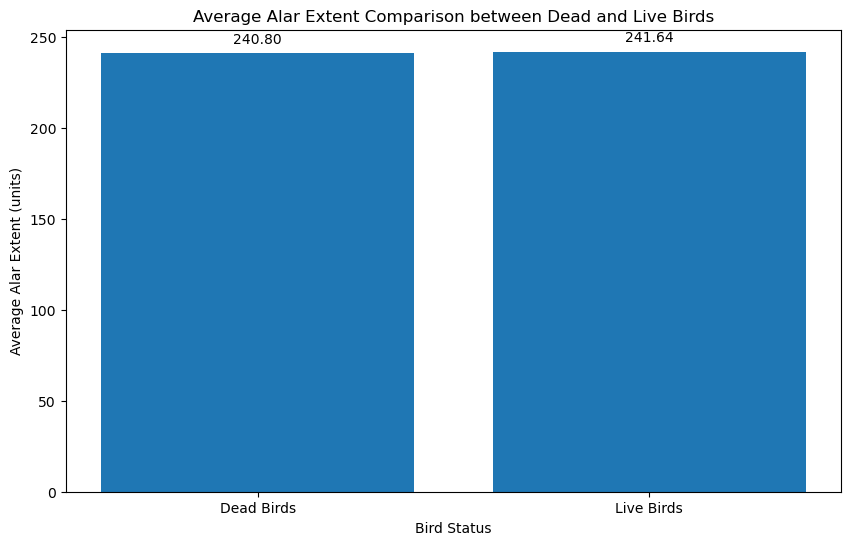

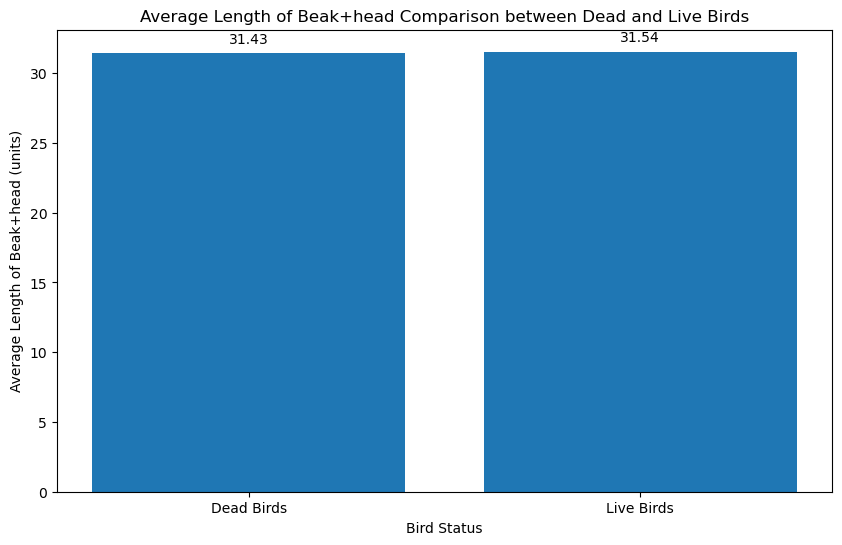

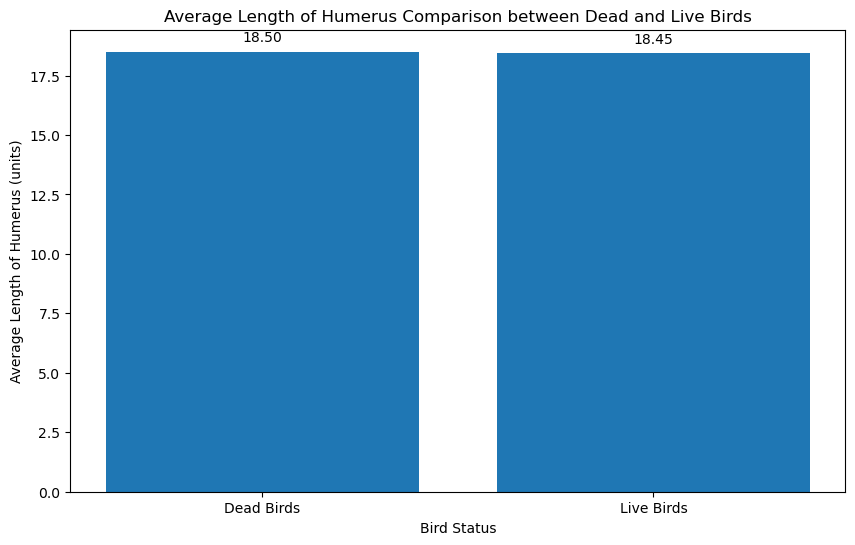

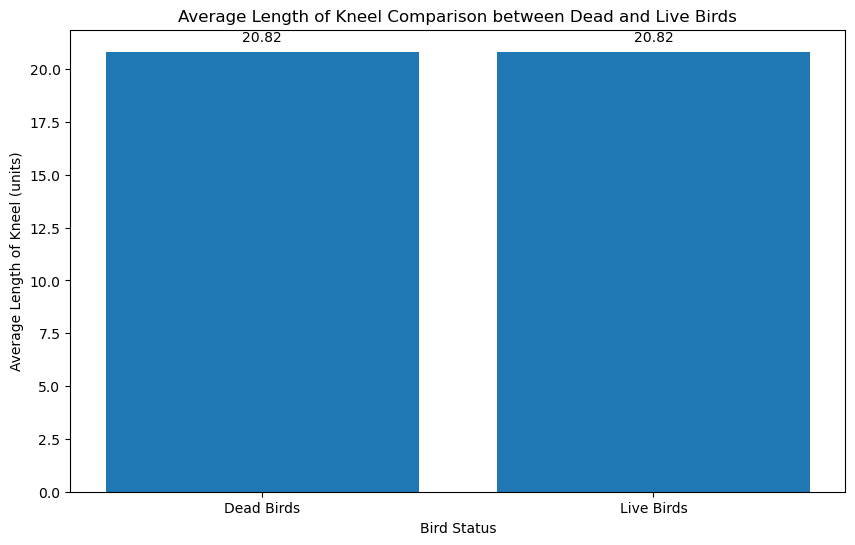

In [5]:
# Visualize the comparison between dead and live birds for each feature using bar charts with values
features = ['Total Length', 'Alar Extent', 'Length of Beak+head', 'Length of Humerus', 'Length of Kneel']

for feature in features:
    plt.figure(figsize=(10, 6))
    bars = plt.bar(['Dead Birds', 'Live Birds'], [dead_birds[feature].mean(), live_birds[feature].mean()])
    plt.title(f'Average {feature} Comparison between Dead and Live Birds')
    plt.ylabel(f'Average {feature} (units)')
    plt.xlabel('Bird Status')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),  # 5 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    
    plt.show()


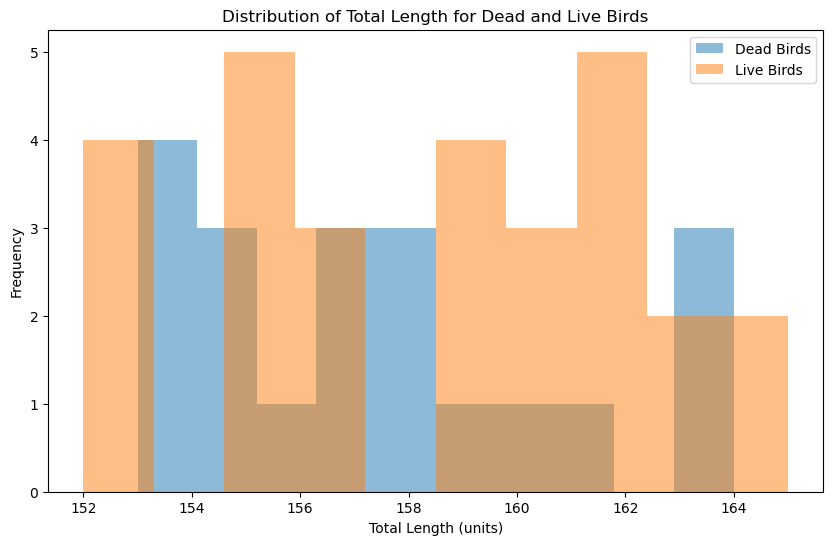

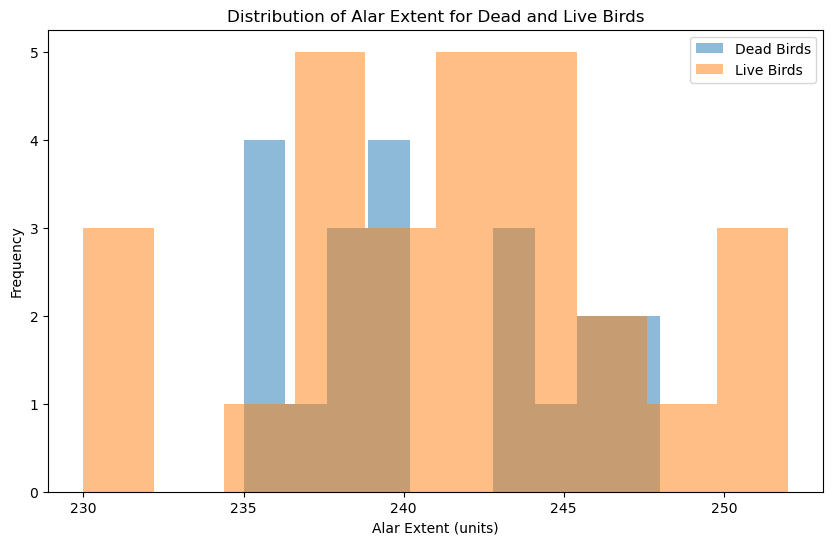

In [6]:
# Visualize the distribution of Total Length and Alar Extent using histograms for dead and live birds
plt.figure(figsize=(10, 6))
plt.hist(dead_birds['Total Length'], bins=10, alpha=0.5, label='Dead Birds')
plt.hist(live_birds['Total Length'], bins=10, alpha=0.5, label='Live Birds')
plt.title('Distribution of Total Length for Dead and Live Birds')
plt.xlabel('Total Length (units)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(dead_birds['Alar Extent'], bins=10, alpha=0.5, label='Dead Birds')
plt.hist(live_birds['Alar Extent'], bins=10, alpha=0.5, label='Live Birds')
plt.title('Distribution of Alar Extent for Dead and Live Birds')
plt.xlabel('Alar Extent (units)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<Figure size 1400x800 with 0 Axes>

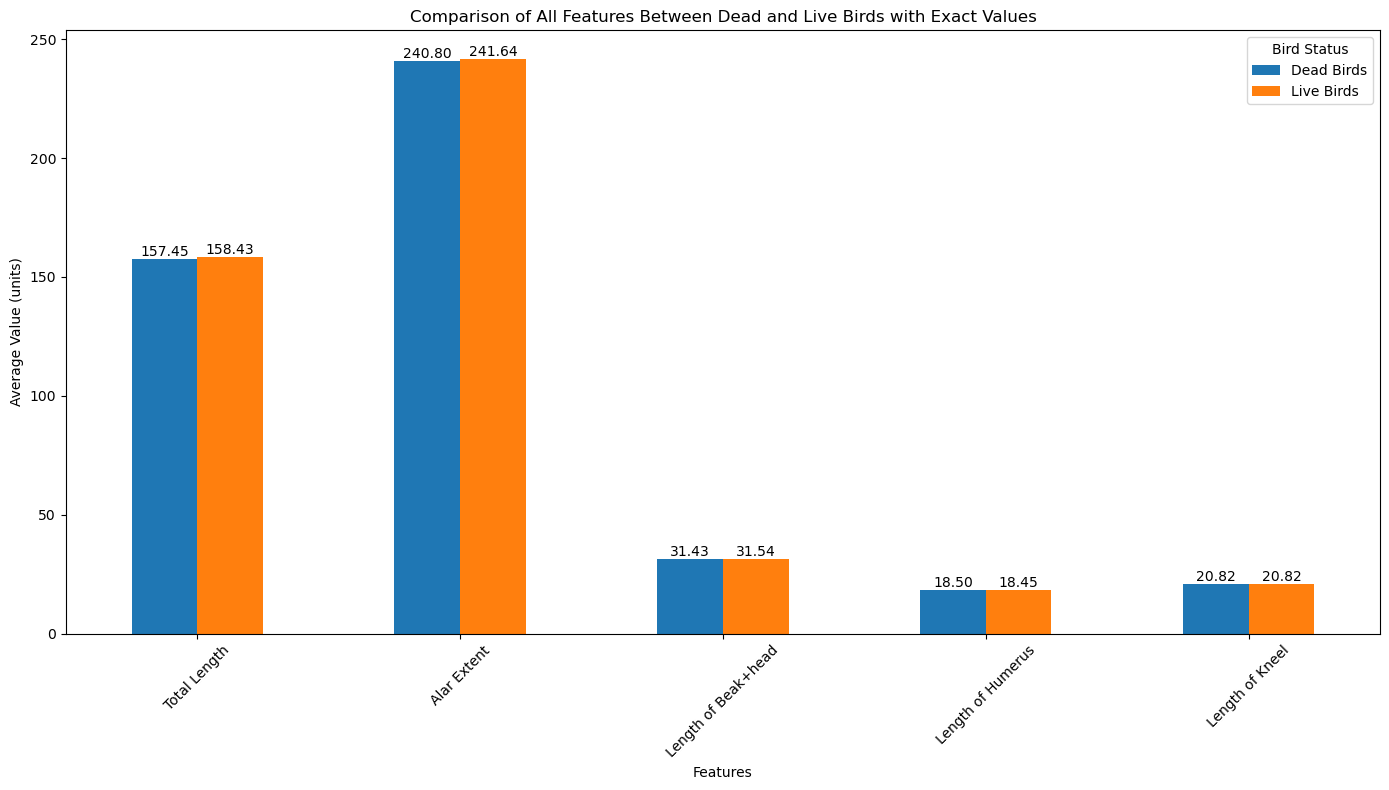

In [7]:
# Calculate the mean values of features for dead and live birds
mean_values = pd.DataFrame({
    'Dead Birds': dead_birds[features].mean(),
    'Live Birds': live_birds[features].mean()
})

# Create a grouped bar chart with values displayed on top
plt.figure(figsize=(14, 8))
ax = mean_values.plot(kind='bar', figsize=(14, 8))

# Add the value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.title('Comparison of All Features Between Dead and Live Birds with Exact Values')
plt.ylabel('Average Value (units)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Bird Status', loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

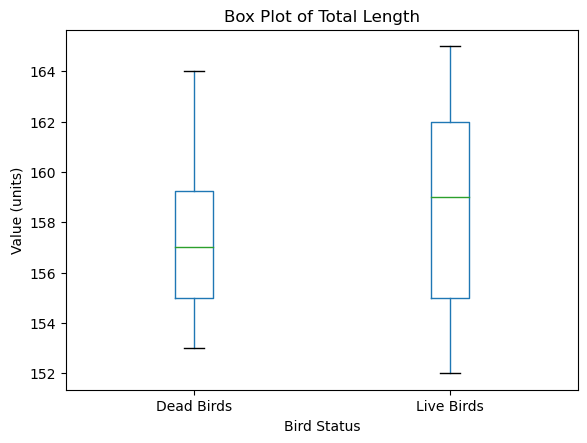

<Figure size 800x600 with 0 Axes>

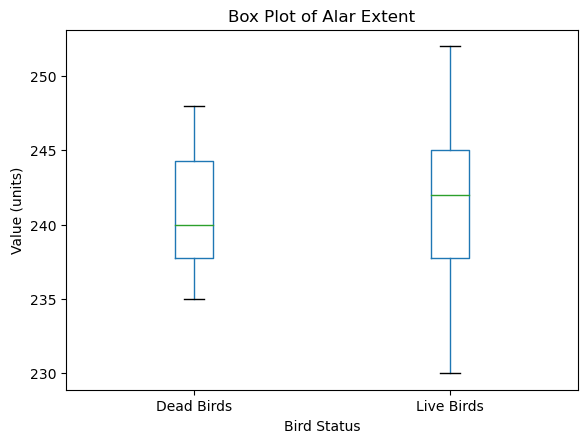

<Figure size 800x600 with 0 Axes>

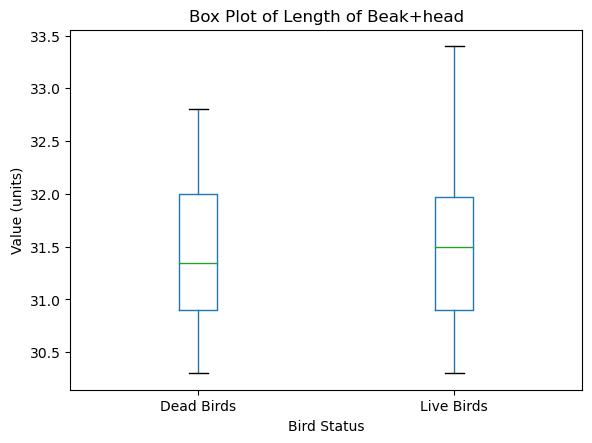

<Figure size 800x600 with 0 Axes>

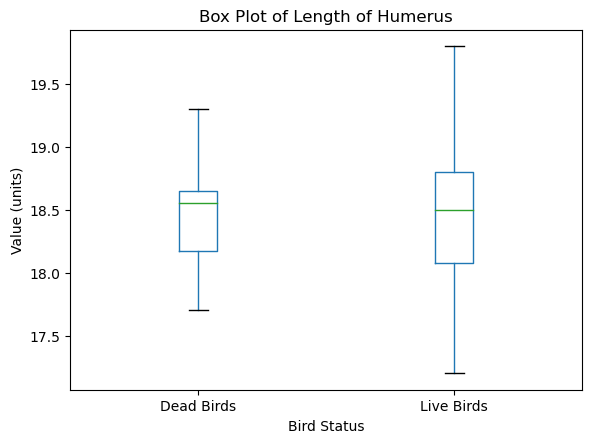

<Figure size 800x600 with 0 Axes>

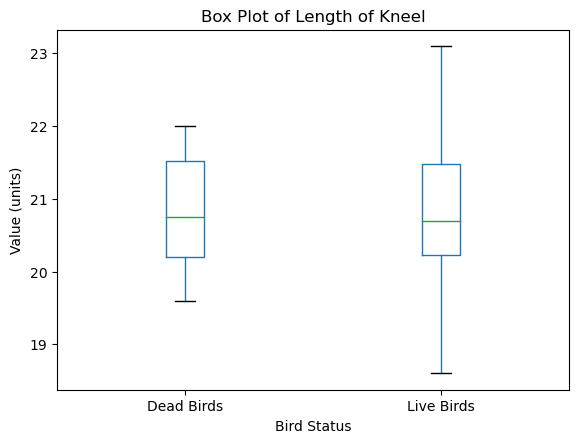

In [8]:
# Create separate box plots for each feature to avoid overlap issues
# Combining the data for visualization
bird_data['Status'] = bird_data['Dead or Survived'].replace({0: 'Dead Birds', 1: 'Live Birds'})

# Create a box plot for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    bird_data.boxplot(column=feature, by='Status', grid=False)
    plt.title(f'Box Plot of {feature}')
    plt.suptitle('')  # Remove the overall title added by default
    plt.xlabel('Bird Status')
    plt.ylabel('Value (units)')
    plt.show()


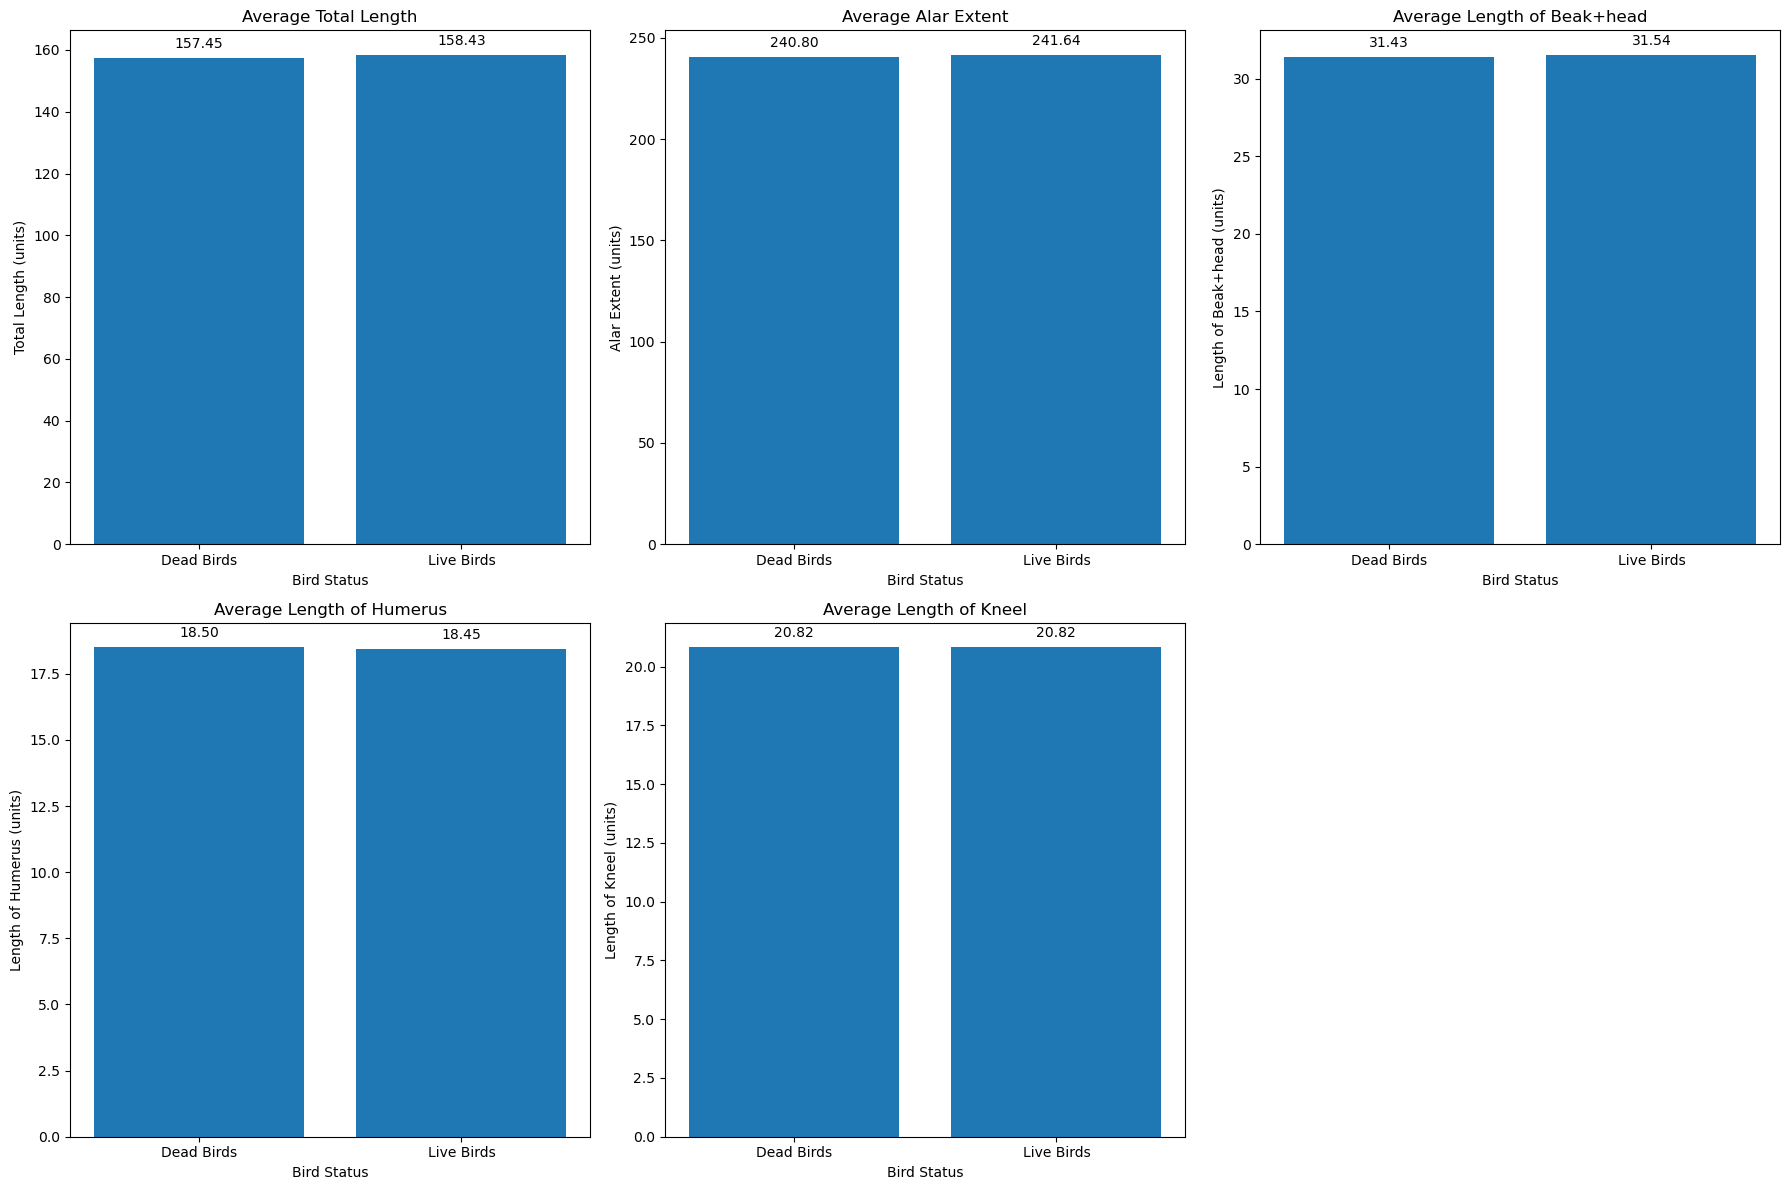

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the features
features = ['Total Length', 'Alar Extent', 'Length of Beak+head', 'Length of Humerus', 'Length of Kneel']

# Create a single figure for all bar charts
plt.figure(figsize=(18, 12))

# Plot each feature in a subplot
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    bars = plt.bar(['Dead Birds', 'Live Birds'], [dead_birds[feature].mean(), live_birds[feature].mean()])
    plt.title(f'Average {feature}')
    plt.ylabel(f'{feature} (units)')
    plt.xlabel('Bird Status')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5), textcoords="offset points",
                     ha='center', va='bottom')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


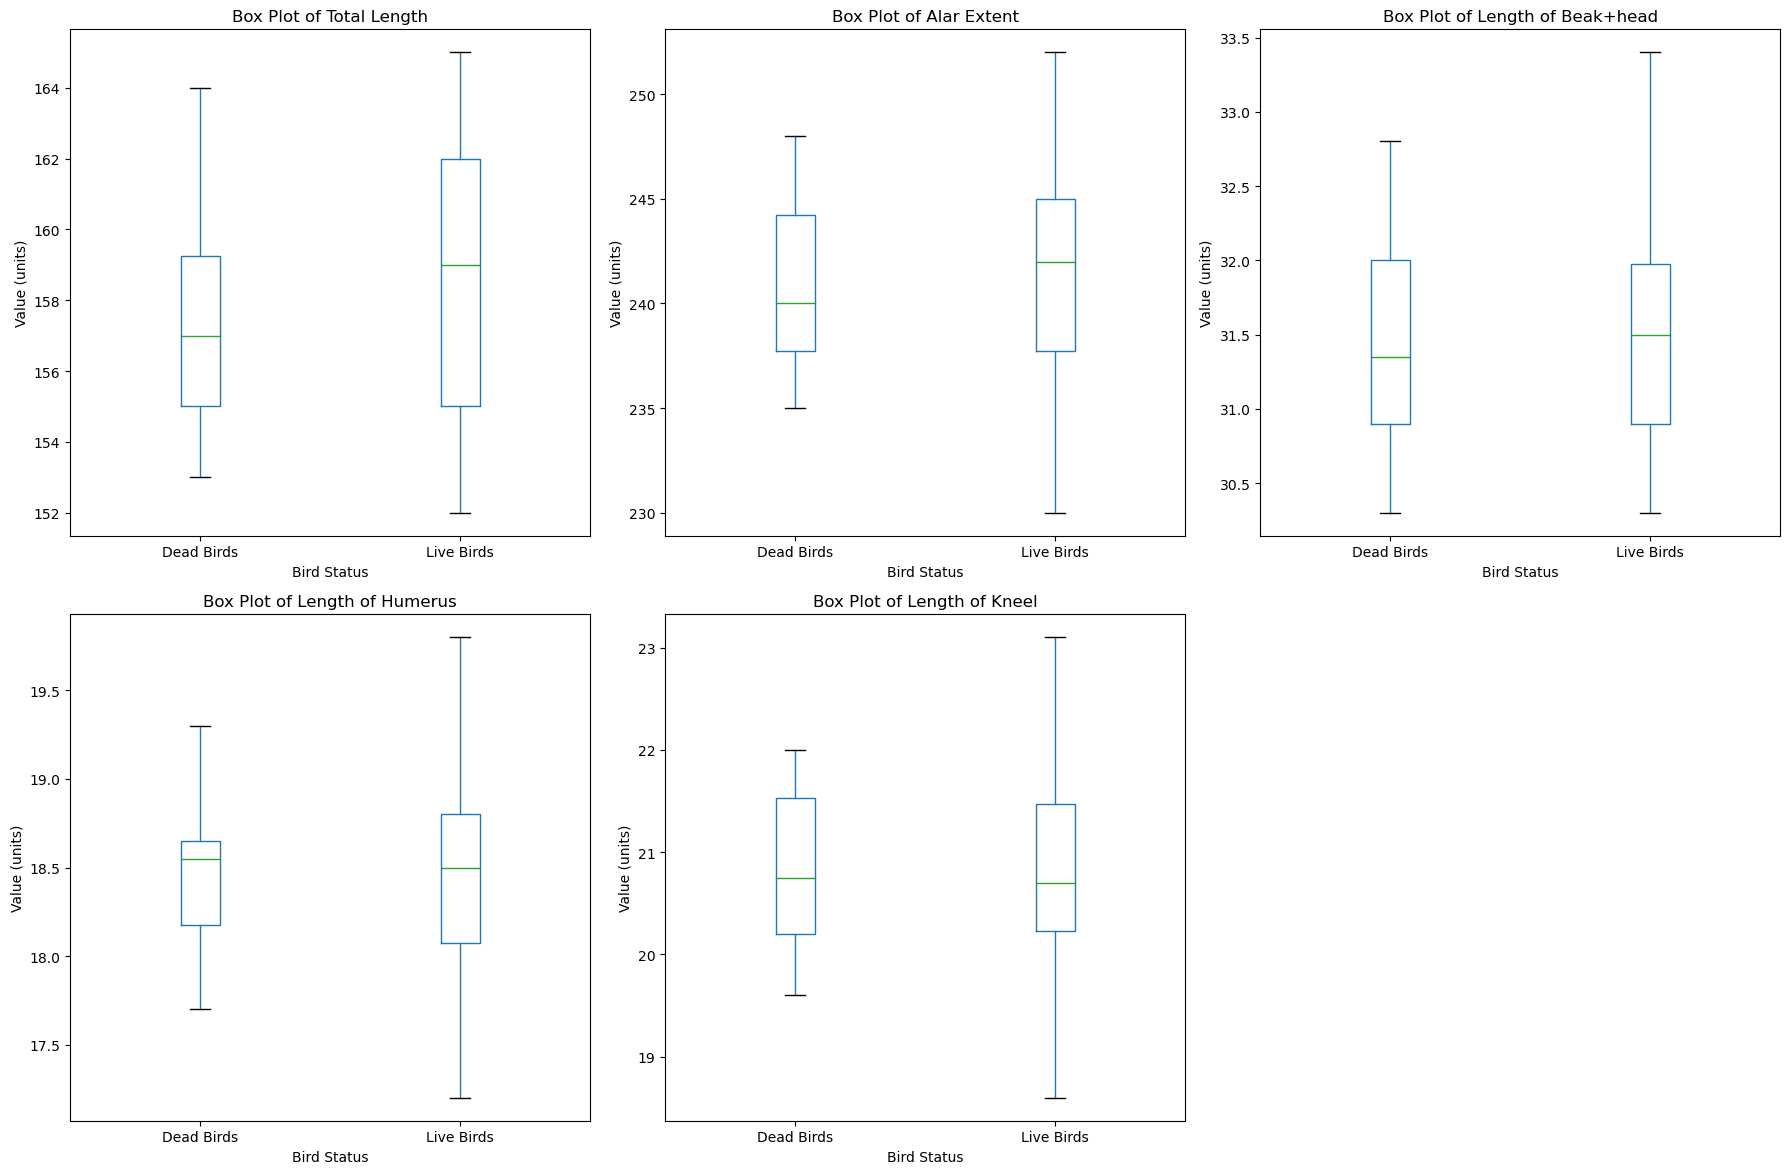

In [10]:
# Create a single figure for all box plots using plt.subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2x3 grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    bird_data.boxplot(column=feature, by='Status', grid=False, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel('Bird Status')
    axes[i].set_ylabel('Value (units)')

# Remove any empty subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Remove the default overall title
plt.suptitle('')
plt.tight_layout()
plt.show()


In [ ]:
# Correlation matrix
correlation_matrix = bird_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Import the seaborn library
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

